In [138]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd

In [139]:
dataframe=pd.read_csv("player_stats.csv",sep=',', header=1)

In [140]:
dataframe=dataframe.drop(["Nation","Pos","Squad"],axis=1)

In [141]:
selectedData = dataframe.filter(['Player','90s', 'npxG+xA'], axis=1)

In [142]:
selectedData = selectedData[selectedData['90s'] > 7]
selectedData = selectedData[selectedData['npxG+xA'] > 4]
len(selectedData)

44

In [143]:
for i, row in selectedData.iterrows():
    ifor_val=selectedData.at[i,'Player'].split("\\",1)
    selectedData.at[i,'Player']=ifor_val[0]
    
    #selectedData.at[i,'Player'] = ifor_val
selectedData

,Player,90s,npxG+xA
34,Marco Asensio,10.0,5.1
35,Iago Aspas,16.8,8.3
62,Karim Benzema,18.3,14.4
63,Álex Berenguer,12.2,4.1
67,Lucas Boyé,12.8,4.6
83,Sergio Canales,16.6,6.3
90,Yannick Carrasco,16.5,5.2
111,Ángel Correa,12.9,6.5
127,Memphis Depay,15.3,8.2
128,Sergiño Dest,10.7,4.2


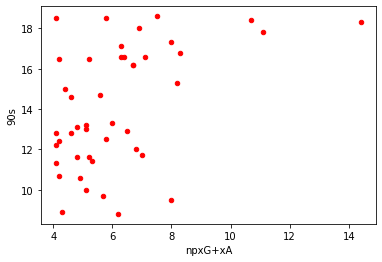

In [144]:
selectedData.plot(kind='scatter',x='npxG+xA',y='90s',color='red')
plt.show()